In [ ]:
!pip install torchsummaryX

In [ ]:
!pip install pretrainedmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=7b2e9e04bbf0189940bf3568b6b6aaabe435fcf582a4bcaf313ac2d1ccc213e8
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built pretrainedmodels


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet50
from torchvision.transforms import ToTensor
from torch.autograd import Variable
import torch.utils.data as data
from PIL import Image
import natsort
import os
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import pywt
import shutil
import sklearn.model_selection as sk
from torch.utils.data import DataLoader, TensorDataset
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from torchvision import transforms, models
from torchvision import utils
from torchsummary import summary
from torchsummaryX import summary

import pretrainedmodels
import timm
from PIL import Image, ImageFilter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset path load
train_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/train_set/'
train_label = pd.read_csv('/content/drive/MyDrive/brainAI/train.csv')

In [ ]:
# def preprocess_image(img):
#   color_image = np.array(img)
#   grayscale_image = img.convert("L")
#   grayscale_image = np.array(grayscale_image)
#   threshold_min=130
#   threshold_max=255

#   # canny = cv2.Canny(img, 500, 700) # 처리할 이미지 사진 / min Threshold / max Threshold
#   # #blurred = cv2.blur(img, (25, 25))  # 주변 값으로 대체하기 위해 이미지 블러링 수행


#   # result = np.where(canny != 0, img, dst)
#   canny = cv2.Canny(grayscale_image, 500, 700)  # Canny 엣지 검출
#   blurred_edges = cv2.blur(canny, (17, 17))  # 엣지 영역을 블러링하여 부드럽게 처리
#   blurred_image = cv2.blur(grayscale_image, (17, 17))  # 이미지 전체를 블러링하여 주변 값으로 대체할 대상 생성

#   result = np.where(canny != 0, grayscale_image, blurred_image)
#   _, binary_image = cv2.threshold(result, threshold_min, threshold_max, cv2.THRESH_BINARY)
#   contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#   max_contour = max(contours, key=cv2.contourArea)
#   x, y, w, h = cv2.boundingRect(max_contour)
#   margin = 15

#   cropped_image = color_image[y+margin:y+h-margin, x+margin:x+w-margin]

In [ ]:
# os.makedirs('/content/drive/MyDrive/2023_k_ium_composition/train_set_multi/LI-A_processed')
# os.makedirs('/content/drive/MyDrive/2023_k_ium_composition/train_set_multi/LI-B_processed')
# os.makedirs('/content/drive/MyDrive/2023_k_ium_composition/train_set_multi/LV-A_processed')
# os.makedirs('/content/drive/MyDrive/2023_k_ium_composition/train_set_multi/LV-B_processed')
# os.makedirs('/content/drive/MyDrive/2023_k_ium_composition/train_set_multi/RI-A_processed')
# os.makedirs('/content/drive/MyDrive/2023_k_ium_composition/train_set_multi/RI-B_processed')
# os.makedirs('/content/drive/MyDrive/2023_k_ium_composition/train_set_multi/RV-A_processed')
# os.makedirs('/content/drive/MyDrive/2023_k_ium_composition/train_set_multi/RV-B_processed')

LI_A_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/LI-A_processed/'
LI_B_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/LI-B_processed/'
LV_A_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/LV-A_processed/'
LV_B_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/LV-B_processed/'
RI_A_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/RI-A_processed/'
RI_B_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/RI-B_processed/'
RV_A_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/RV-A_processed/'
RV_B_path = '/content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/RV-B_processed/'

In [ ]:
# # 이미지를 클래스별로 분류하고 저장
# for filename in os.listdir(train_path):
#     source_path = os.path.join(train_path, filename)

#     if 'LI-A' in filename:
#         destination_path = os.path.join(LI_A_path, filename)
#     elif 'LI-B' in filename:
#         destination_path = os.path.join(LI_B_path, filename)
#     elif 'LV-A' in filename:
#         destination_path = os.path.join(LV_A_path, filename)
#     elif 'LV-B' in filename:
#         destination_path = os.path.join(LV_B_path, filename)
#     elif 'RI-A' in filename:
#         destination_path = os.path.join(RI_A_path, filename)
#     elif 'RI-B' in filename:
#         destination_path = os.path.join(RI_B_path, filename)
#     elif 'RV-A' in filename:
#         destination_path = os.path.join(RV_A_path, filename)
#     elif 'RV-B' in filename:
#         destination_path = os.path.join(RV_B_path, filename)
#     else:
#         continue

#     img = Image.open(source_path)
#     cropped_image = preprocess_image(img)

#     # If cropped_image is None, save the original image
#     if cropped_image is None:
#         shutil.copy(source_path, destination_path)
#     else:
#         cropped_img_pil = Image.fromarray(cropped_image)
#         cropped_img_pil.save(destination_path)

# print("Image classification and saving completed.")

In [ ]:
file_count = len(os.listdir(train_path))
print(f"경로 {train_path}에는 {file_count}개의 파일이 있습니다.")

FileNotFoundError: ignored

In [ ]:
# 중복 파일 제거 함수 정의
def remove_duplicates_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if '(1)' in filename:
            file_path = os.path.join(folder_path, filename)
            os.remove(file_path)

# 중복 파일 제거 실행
remove_duplicates_in_folder(LI_A_path)
remove_duplicates_in_folder(LI_B_path)
remove_duplicates_in_folder(LV_A_path)
remove_duplicates_in_folder(LV_B_path)
remove_duplicates_in_folder(RI_A_path)
remove_duplicates_in_folder(RI_B_path)
remove_duplicates_in_folder(RV_A_path)
remove_duplicates_in_folder(RV_B_path)

print("Duplicate file removal completed.")

In [ ]:
# 8가지 경로 리스트
paths = [LI_A_path, LI_B_path, LV_A_path, LV_B_path, RI_A_path, RI_B_path, RV_A_path, RV_B_path]

# 각 경로별 파일 개수 확인
for path in paths:
    file_count = len(os.listdir(path))
    print(f"경로 {path}에는 {file_count}개의 파일이 있습니다.") # 모두 1127개의 파일이 있는 것으로 출력되어야함, 그렇지 않을 경우 파일 삭제 후 위의 코드 다시 수행할 것

경로 /content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/LI-A_processed/에는 1127개의 파일이 있습니다.
경로 /content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/LI-B_processed/에는 1127개의 파일이 있습니다.
경로 /content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/LV-A_processed/에는 1127개의 파일이 있습니다.
경로 /content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/LV-B_processed/에는 1127개의 파일이 있습니다.
경로 /content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/RI-A_processed/에는 1127개의 파일이 있습니다.
경로 /content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/RI-B_processed/에는 1127개의 파일이 있습니다.
경로 /content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/RV-A_processed/에는 1127개의 파일이 있습니다.
경로 /content/drive/MyDrive/brainAI/2023_k_ium_composition/train_set_multi/RV-B_processed/에는 1127개의 파일이 있습니다.


In [ ]:
df_csv = '/content/drive/MyDrive/brainAI/train.csv'
df = pd.read_csv(df_csv)
df

,Index,Aneurysm,L_ICA,R_ICA,L_PCOM,R_PCOM,L_AntChor,R_AntChor,L_ACA,R_ACA,...,R_MCA,L_VA,R_VA,L_PICA,R_PICA,L_SCA,R_SCA,BA,L_PCA,R_PCA
0,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1002,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1004,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1005,1,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2607,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1123,2608,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1124,2609,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1125,2610,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
regression_df = df.iloc[:,[0,1]]
print(regression_df)

      Index  Aneurysm
0      1001         0
1      1002         1
2      1004         1
3      1005         1
4      1006         0
...     ...       ...
1122   2607         1
1123   2608         1
1124   2609         0
1125   2610         0
1126   2611         0

[1127 rows x 2 columns]


In [ ]:
train_label = []
reg_df = regression_df.iloc[:, 1]

for i in reg_df:
  train_label.append(i)

print(train_label)

[0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 

In [ ]:
# 데이터 증강을 위한 변환 기법 정의
np.random.seed(1)
torch.manual_seed(1)

In [ ]:
IMG_SIZE = 100
data = []
classes = ['yes', 'no']

files = natsort.natsorted(os.listdir(LI_A_path))
for f in files:
    img = Image.open(LI_A_path + '/' + f)

    # 이미지 리사이즈
    img = img.resize((IMG_SIZE, IMG_SIZE))

    one_img = np.asarray(np.float32(img))
    norm_img = one_img / 255.0

    img = np.asarray([norm_img])
    data.append(img)

data1 = np.array(data, dtype='float32')
label1 = np.array(train_label, dtype='float32')

In [ ]:
data = []
classes = ['yes', 'no']

files = natsort.natsorted(os.listdir(LI_B_path))
for f in files:
    img = Image.open(LI_B_path + '/' + f)

    # 이미지 리사이즈
    img = img.resize((IMG_SIZE, IMG_SIZE))

    one_img = np.asarray(np.float32(img))
    norm_img = one_img / 255.0

    img = np.asarray([norm_img])
    data.append(img)

data2 = np.array(data, dtype='float32')
label2 = np.array(train_label, dtype='float32')

In [ ]:
data = []
classes = ['yes', 'no']

files = natsort.natsorted(os.listdir(LV_A_path))
for f in files:
    img = Image.open(LV_A_path + '/' + f)

    # 이미지 리사이즈
    img = img.resize((IMG_SIZE, IMG_SIZE))

    one_img = np.asarray(np.float32(img))
    norm_img = one_img / 255.0

    img = np.asarray([norm_img])
    data.append(img)

data3 = np.array(data, dtype='float32')
label3 = np.array(train_label, dtype='float32')

In [ ]:
data = []
classes = ['yes', 'no']

files = natsort.natsorted(os.listdir(LV_B_path))
for f in files:
    img = Image.open(LV_B_path + '/' + f)

    # 이미지 리사이즈
    img = img.resize((IMG_SIZE, IMG_SIZE))

    one_img = np.asarray(np.float32(img))
    norm_img = one_img / 255.0

    img = np.asarray([norm_img])
    data.append(img)

data4 = np.array(data, dtype='float32')
label4 = np.array(train_label, dtype='float32')

In [ ]:
data = []
classes = ['yes', 'no']

files = natsort.natsorted(os.listdir(RI_A_path))
for f in files:
    img = Image.open(RI_A_path + '/' + f)

    # 이미지 리사이즈
    img = img.resize((IMG_SIZE, IMG_SIZE))

    one_img = np.asarray(np.float32(img))
    norm_img = one_img / 255.0

    img = np.asarray([norm_img])
    data.append(img)

data5 = np.array(data, dtype='float32')
label5 = np.array(train_label, dtype='float32')

In [ ]:
data = []
classes = ['yes', 'no']

files = natsort.natsorted(os.listdir(RI_B_path))
for f in files:
    img = Image.open(RI_B_path + '/' + f)

    # 이미지 리사이즈
    img = img.resize((IMG_SIZE, IMG_SIZE))

    one_img = np.asarray(np.float32(img))
    norm_img = one_img / 255.0

    img = np.asarray([norm_img])
    data.append(img)

data6 = np.array(data, dtype='float32')
label6 = np.array(train_label, dtype='float32')

In [ ]:
data = []
classes = ['yes', 'no']

files = natsort.natsorted(os.listdir(RV_A_path))
for f in files:
    img = Image.open(RV_A_path + '/' + f)

    # 이미지 리사이즈
    img = img.resize((IMG_SIZE, IMG_SIZE))

    one_img = np.asarray(np.float32(img))
    norm_img = one_img / 255.0

    img = np.asarray([norm_img])
    data.append(img)

data7 = np.array(data, dtype='float32')
label7 = np.array(train_label, dtype='float32')

In [ ]:
data = []
classes = ['yes', 'no']

files = natsort.natsorted(os.listdir(RV_B_path))
for f in files:
    img = Image.open(RV_B_path + '/' + f)

    # 이미지 리사이즈
    img = img.resize((IMG_SIZE, IMG_SIZE))

    one_img = np.asarray(np.float32(img))
    norm_img = one_img / 255.0

    img = np.asarray([norm_img])
    data.append(img)

data8 = np.array(data, dtype='float32')
label8 = np.array(train_label, dtype='float32')

In [ ]:
total_X1 = torch.from_numpy(data1)
total_X1 = total_X1.view(-1, 3, 100, 100)
total_Y1 = torch.from_numpy(label1)

total_X2 = torch.from_numpy(data2)
total_X2 = total_X2.view(-1, 3, 100, 100)
total_Y2 = torch.from_numpy(label2)

total_X3 = torch.from_numpy(data3)
total_X3 = total_X3.view(-1, 3, 100, 100)
total_Y3 = torch.from_numpy(label3)

total_X4 = torch.from_numpy(data4)
total_X4 = total_X4.view(-1, 3, 100, 100)
total_Y4 = torch.from_numpy(label4)

total_X5 = torch.from_numpy(data5)
total_X5 = total_X5.view(-1, 3, 100, 100)
total_Y5 = torch.from_numpy(label5)

total_X6 = torch.from_numpy(data6)
total_X6 = total_X6.view(-1, 3, 100, 100)
total_Y6 = torch.from_numpy(label6)

total_X7 = torch.from_numpy(data7)
total_X7 = total_X7.view(-1, 3, 100, 100)
total_Y7 = torch.from_numpy(label7)

total_X8 = torch.from_numpy(data8)
total_X8 = total_X8.view(-1, 3, 100, 100)
total_Y8 = torch.from_numpy(label8)

In [ ]:
total_X1[0].size()

torch.Size([3, 100, 100])

In [ ]:
# Dataset split
X1_train, X1_valid, Y1_train, Y1_valid = sk.train_test_split(total_X1, total_Y1, test_size=0.2, random_state=100, stratify=total_Y1)
print(X1_train.shape, X1_valid.shape, Y1_train.shape, Y1_valid.shape)

# Dataset split
X2_train, X2_valid, Y2_train, Y2_valid = sk.train_test_split(total_X2, total_Y2, test_size=0.2, random_state=100, stratify=total_Y2)
print(X2_train.shape, X2_valid.shape, Y2_train.shape, Y2_valid.shape)

# Dataset split
X3_train, X3_valid, Y3_train, Y3_valid = sk.train_test_split(total_X3, total_Y3, test_size=0.2, random_state=100, stratify=total_Y3)
print(X3_train.shape, X3_valid.shape, Y3_train.shape, Y3_valid.shape)

# Dataset split
X4_train, X4_valid, Y4_train, Y4_valid = sk.train_test_split(total_X4, total_Y4, test_size=0.2, random_state=100, stratify=total_Y4)
print(X4_train.shape, X4_valid.shape, Y4_train.shape, Y4_valid.shape)

# Dataset split
X5_train, X5_valid, Y5_train, Y5_valid = sk.train_test_split(total_X5, total_Y5, test_size=0.2, random_state=100, stratify=total_Y5)
print(X5_train.shape, X5_valid.shape, Y5_train.shape, Y5_valid.shape)

# Dataset split
X6_train, X6_valid, Y6_train, Y6_valid = sk.train_test_split(total_X6, total_Y6, test_size=0.2, random_state=100, stratify=total_Y6)
print(X6_train.shape, X6_valid.shape, Y6_train.shape, Y6_valid.shape)

# Dataset split
X7_train, X7_valid, Y7_train, Y7_valid = sk.train_test_split(total_X7, total_Y7, test_size=0.2, random_state=100, stratify=total_Y7)
print(X7_train.shape, X7_valid.shape, Y7_train.shape, Y7_valid.shape)

# Dataset split
X8_train, X8_valid, Y8_train, Y8_valid = sk.train_test_split(total_X8, total_Y8, test_size=0.2, random_state=100, stratify=total_Y8)
print(X8_train.shape, X8_valid.shape, Y8_train.shape, Y8_valid.shape)

torch.Size([901, 3, 100, 100]) torch.Size([226, 3, 100, 100]) torch.Size([901]) torch.Size([226])
torch.Size([901, 3, 100, 100]) torch.Size([226, 3, 100, 100]) torch.Size([901]) torch.Size([226])
torch.Size([901, 3, 100, 100]) torch.Size([226, 3, 100, 100]) torch.Size([901]) torch.Size([226])
torch.Size([901, 3, 100, 100]) torch.Size([226, 3, 100, 100]) torch.Size([901]) torch.Size([226])
torch.Size([901, 3, 100, 100]) torch.Size([226, 3, 100, 100]) torch.Size([901]) torch.Size([226])
torch.Size([901, 3, 100, 100]) torch.Size([226, 3, 100, 100]) torch.Size([901]) torch.Size([226])
torch.Size([901, 3, 100, 100]) torch.Size([226, 3, 100, 100]) torch.Size([901]) torch.Size([226])
torch.Size([901, 3, 100, 100]) torch.Size([226, 3, 100, 100]) torch.Size([901]) torch.Size([226])


In [ ]:
#########################
### Data augmentation ###
#########################

np.random.seed(1)
torch.manual_seed(1)

Rotat = transforms.RandomHorizontalFlip()

X_rotat_1 = Rotat(X1_train)
X_rotat_2 = Rotat(X2_train)
X_rotat_3 = Rotat(X3_train)
X_rotat_4 = Rotat(X4_train)
X_rotat_5 = Rotat(X5_train)
X_rotat_6 = Rotat(X6_train)
X_rotat_7 = Rotat(X7_train)
X_rotat_8 = Rotat(X8_train)

In [ ]:
# concentenate
X1_train = torch.cat((X1_train, X_rotat_1))
X2_train = torch.cat((X2_train, X_rotat_2))
X3_train = torch.cat((X3_train, X_rotat_3))
X4_train = torch.cat((X4_train, X_rotat_4))
X5_train = torch.cat((X5_train, X_rotat_5))
X6_train = torch.cat((X6_train, X_rotat_6))
X7_train = torch.cat((X7_train, X_rotat_7))
X8_train = torch.cat((X8_train, X_rotat_8))

Y1_train = torch.cat((Y1_train, Y1_train))

print(X1_train.size(), X2_train.size(), Y1_train.size())

torch.Size([1802, 3, 100, 100]) torch.Size([1802, 3, 100, 100]) torch.Size([1802])


In [ ]:
# DataLoader

import torch
from torch.utils.data import TensorDataset, DataLoader

# 데이터를 TensorDataset으로 묶어서 DataLoader에 전달
train_dataset = TensorDataset(total_X1, total_X2, total_X3, total_X4, total_X5, total_X6, total_X7, total_X8, total_Y1)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

valid_dataset = TensorDataset(X1_valid, X2_valid, X3_valid, X4_valid, X5_valid, X6_valid, X7_valid, X8_valid, Y1_valid)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class MultiInputModel(nn.Module):
    def __init__(self, num_classes):
        super(MultiInputModel, self).__init__()
        self.num_classes = num_classes
        self.num_inputs = 8

        # Load pre-trained ResNet
        self.resnet = models.resnet50(pretrained=True)
        # Remove fully connected layer and average pooling layer
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-2])
        # Freeze parameters in ResNet
        for param in self.resnet.parameters():
            param.requires_grad = False

        # Final classification layer
        self.fc_layer = nn.Sequential(
            nn.Conv2d(8 * 2048, 512, kernel_size=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, num_classes),
            nn.Sigmoid()
        )

    def forward(self, inputs):
        # Process each input through ResNet
        resnet_outputs = [self.resnet(x) for x in inputs]
        # Combine outputs from different inputs
        combined_output = torch.cat(resnet_outputs, dim=1)

        # Pass through fully connected layer
        output = self.fc_layer(combined_output)

        return output

# 모델 초기화
num_classes = 1
model = MultiInputModel(num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 154MB/s]


In [ ]:
from timm import create_model
import torch

model.to(device)

# 모델 구조 출력
print(model)

# 파라미터 수 출력
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {num_params}")

MultiInputModel(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv

In [ ]:
def run_train(model, criterion, optimizer, train_loader):
    model.train()
    total_loss = 0
    correct = 0
    total_samples = 0

    for inputs1, inputs2, inputs3, inputs4, inputs5, inputs6, inputs7, inputs8, labels in train_loader:
        # Transfer data to device
        inputs1 = inputs1.to(device)
        inputs2 = inputs2.to(device)
        inputs3 = inputs3.to(device)
        inputs4 = inputs4.to(device)
        inputs5 = inputs5.to(device)
        inputs6 = inputs6.to(device)
        inputs7 = inputs7.to(device)
        inputs8 = inputs8.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        output = model([inputs1, inputs2, inputs3, inputs4, inputs5, inputs6, inputs7, inputs8])

        # Reshape labels to match the output shape (batch_size, num_classes)
        labels = labels.view(-1, 1).float()

        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Convert model output to binary predictions
        predictions = (output >= 0.5).float()
        correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

    accuracy = 100.0 * correct / total_samples
    return total_loss, accuracy


In [ ]:
def run_valid(model, criterion, valid_loader):
    model.eval()
    total_loss = 0
    correct = 0
    total_samples = 0

    for inputs1, inputs2, inputs3, inputs4, inputs5, inputs6, inputs7, inputs8, labels in valid_loader:
        # Transfer data to device
        inputs1 = inputs1.to(device)
        inputs2 = inputs2.to(device)
        inputs3 = inputs3.to(device)
        inputs4 = inputs4.to(device)
        inputs5 = inputs5.to(device)
        inputs6 = inputs6.to(device)
        inputs7 = inputs7.to(device)
        inputs8 = inputs8.to(device)
        labels = labels.to(device)

        output = model([inputs1, inputs2, inputs3, inputs4, inputs5, inputs6, inputs7, inputs8])

        # Reshape labels to match the output shape (batch_size, num_classes)
        labels = labels.view(-1, 1).float()

        loss = criterion(output, labels)
        total_loss += loss.item()

        # Convert model output to binary predictions
        predictions = (output >= 0.5).float()
        correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

    accuracy = 100.0 * correct / total_samples
    return total_loss, accuracy

In [ ]:
import gc
import torch

gc.collect()
torch.cuda.empty_cache()

In [ ]:
# 모델 초기화
num_classes = 1  # 이진 분류를 위해 클래스 개수는 1
model = MultiInputModel(num_classes)
model.to(device)

# 손실 함수와 옵티마이저 정의
criterion = nn.BCELoss()  # 이진 분류를 위해 BCELoss 사용
optimizer = optim.SGD(model.parameters(), lr=0.0015, momentum=0.9, weight_decay=5e-4)

***START EPOCH***
# Epoch: 1 / 150
Train Loss: 50.1851, Train Accuracy: 52.62%
Validation Loss: 10.2592, Validation Accuracy: 53.54%


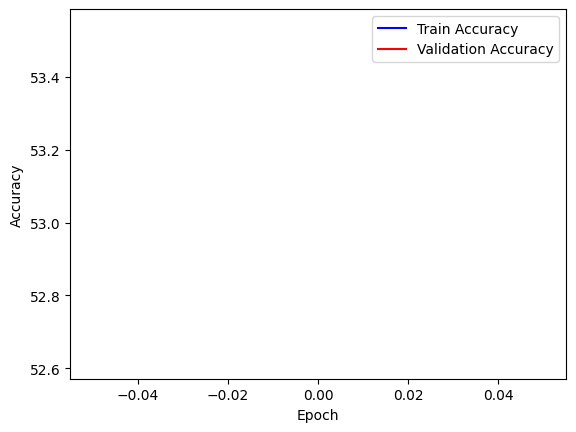

# Epoch: 2 / 150
Train Loss: 48.3391, Train Accuracy: 54.66%
Validation Loss: 10.2986, Validation Accuracy: 51.77%
# Epoch: 3 / 150
Train Loss: 47.2192, Train Accuracy: 61.49%
Validation Loss: 10.5753, Validation Accuracy: 52.65%
# Epoch: 4 / 150
Train Loss: 45.0571, Train Accuracy: 64.06%
Validation Loss: 9.6950, Validation Accuracy: 62.39%
# Epoch: 5 / 150
Train Loss: 42.3495, Train Accuracy: 67.08%
Validation Loss: 8.8888, Validation Accuracy: 71.24%
# Epoch: 6 / 150
Train Loss: 42.1659, Train Accuracy: 68.06%
Validation Loss: 12.5413, Validation Accuracy: 47.35%
# Epoch: 7 / 150
Train Loss: 42.0743, Train Accuracy: 65.66%
Validation Loss: 10.0596, Validation Accuracy: 61.50%
# Epoch: 8 / 150
Train Loss: 36.9319, Train Accuracy: 74.98%
Validation Loss: 10.0512, Validation Accuracy: 62.83%
# Epoch: 9 / 150
Train Loss: 35.3722, Train Accuracy: 75.42%
Validation Loss: 8.5610, Validation Accuracy: 73.01%
# Epoch: 10 / 150
Train Loss: 40.2557, Train Accuracy: 73.91%
Validation Loss: 9.77

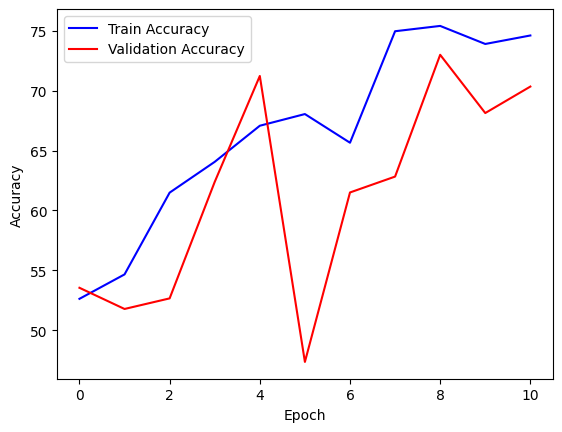

# Epoch: 12 / 150
Train Loss: 29.5232, Train Accuracy: 81.54%
Validation Loss: 7.8833, Validation Accuracy: 80.09%
# Epoch: 13 / 150
Train Loss: 31.5300, Train Accuracy: 79.33%
Validation Loss: 8.6384, Validation Accuracy: 76.55%
# Epoch: 14 / 150
Train Loss: 28.1993, Train Accuracy: 82.70%
Validation Loss: 5.6859, Validation Accuracy: 88.94%
# Epoch: 15 / 150
Train Loss: 28.7535, Train Accuracy: 82.08%
Validation Loss: 5.7791, Validation Accuracy: 87.17%
# Epoch: 16 / 150
Train Loss: 26.2383, Train Accuracy: 84.21%
Validation Loss: 6.0839, Validation Accuracy: 85.40%
# Epoch: 17 / 150
Train Loss: 28.4324, Train Accuracy: 81.90%
Validation Loss: 9.1916, Validation Accuracy: 66.81%
# Epoch: 18 / 150
Train Loss: 33.5862, Train Accuracy: 79.06%
Validation Loss: 10.0871, Validation Accuracy: 63.27%
# Epoch: 19 / 150
Train Loss: 27.4683, Train Accuracy: 82.43%
Validation Loss: 6.5896, Validation Accuracy: 80.97%
# Epoch: 20 / 150
Train Loss: 23.3079, Train Accuracy: 85.98%
Validation Loss: 

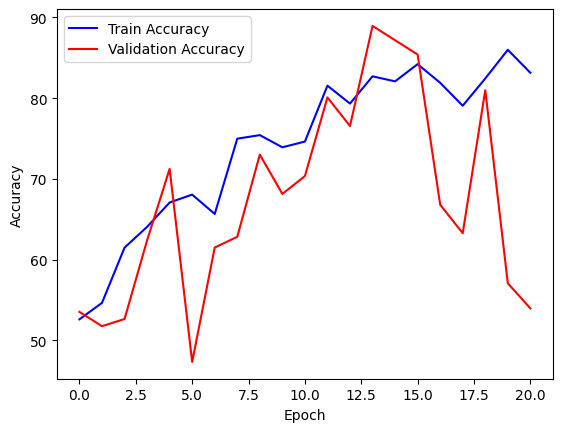

# Epoch: 22 / 150
Train Loss: 29.1175, Train Accuracy: 81.28%
Validation Loss: 16.2623, Validation Accuracy: 55.31%
# Epoch: 23 / 150
Train Loss: 24.8171, Train Accuracy: 83.94%
Validation Loss: 6.3243, Validation Accuracy: 83.19%
# Epoch: 24 / 150
Train Loss: 20.2706, Train Accuracy: 88.46%
Validation Loss: 4.9925, Validation Accuracy: 87.61%
# Epoch: 25 / 150
Train Loss: 19.9232, Train Accuracy: 89.44%
Validation Loss: 9.2222, Validation Accuracy: 73.01%
# Epoch: 26 / 150
Train Loss: 15.8653, Train Accuracy: 91.13%
Validation Loss: 18.8671, Validation Accuracy: 54.42%
# Epoch: 27 / 150
Train Loss: 26.4410, Train Accuracy: 83.85%
Validation Loss: 5.0025, Validation Accuracy: 86.73%
# Epoch: 28 / 150
Train Loss: 20.0917, Train Accuracy: 88.20%
Validation Loss: 5.5069, Validation Accuracy: 81.86%
# Epoch: 29 / 150
Train Loss: 16.7255, Train Accuracy: 91.66%
Validation Loss: 4.9502, Validation Accuracy: 89.38%
# Epoch: 30 / 150
Train Loss: 11.8262, Train Accuracy: 95.56%
Validation Loss:

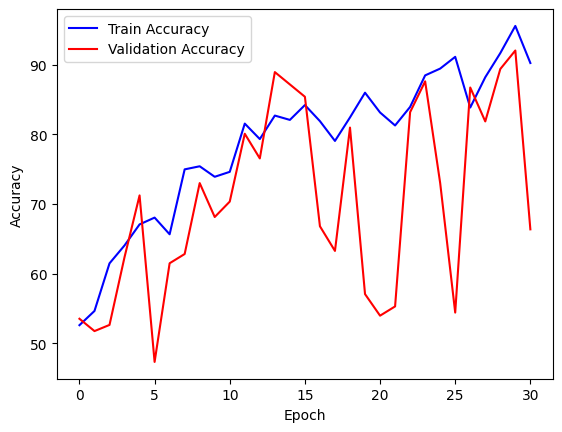

# Epoch: 32 / 150
Train Loss: 15.9380, Train Accuracy: 91.75%
Validation Loss: 8.8916, Validation Accuracy: 72.57%
# Epoch: 33 / 150
Train Loss: 11.8656, Train Accuracy: 94.23%
Validation Loss: 2.9859, Validation Accuracy: 92.04%
# Epoch: 34 / 150
Train Loss: 9.9202, Train Accuracy: 94.76%
Validation Loss: 7.4628, Validation Accuracy: 81.42%
# Epoch: 35 / 150
Train Loss: 10.2558, Train Accuracy: 95.56%
Validation Loss: 6.0847, Validation Accuracy: 82.30%
# Epoch: 36 / 150
Train Loss: 10.0494, Train Accuracy: 94.68%
Validation Loss: 8.9450, Validation Accuracy: 77.88%
# Epoch: 37 / 150
Train Loss: 10.5621, Train Accuracy: 94.94%
Validation Loss: 4.6875, Validation Accuracy: 92.48%
# Epoch: 38 / 150
Train Loss: 8.7293, Train Accuracy: 95.56%
Validation Loss: 6.5774, Validation Accuracy: 80.53%
# Epoch: 39 / 150
Train Loss: 8.6648, Train Accuracy: 96.18%
Validation Loss: 5.7625, Validation Accuracy: 86.73%
# Epoch: 40 / 150
Train Loss: 13.8308, Train Accuracy: 92.72%
Validation Loss: 4.69

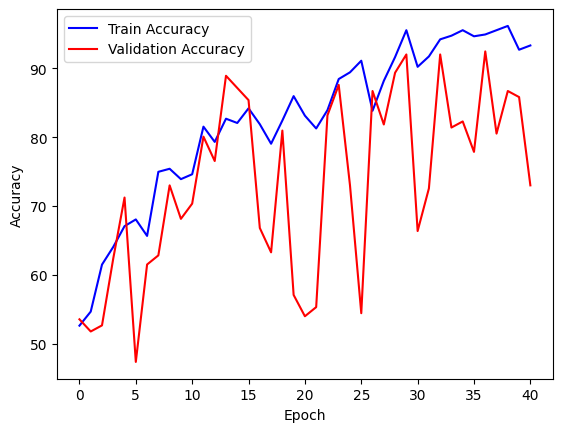

# Epoch: 42 / 150
Train Loss: 6.3115, Train Accuracy: 97.60%
Validation Loss: 4.9285, Validation Accuracy: 89.82%
# Epoch: 43 / 150
Train Loss: 6.6113, Train Accuracy: 96.89%
Validation Loss: 1.9619, Validation Accuracy: 96.90%
# Epoch: 44 / 150
Train Loss: 7.2240, Train Accuracy: 96.72%
Validation Loss: 10.9805, Validation Accuracy: 70.80%
# Epoch: 45 / 150
Train Loss: 8.2736, Train Accuracy: 96.18%
Validation Loss: 9.7339, Validation Accuracy: 75.66%
# Epoch: 46 / 150
Train Loss: 8.3043, Train Accuracy: 96.81%
Validation Loss: 2.5359, Validation Accuracy: 93.81%
# Epoch: 47 / 150
Train Loss: 15.3185, Train Accuracy: 91.93%
Validation Loss: 4.6837, Validation Accuracy: 87.61%
# Epoch: 48 / 150
Train Loss: 6.8264, Train Accuracy: 97.52%
Validation Loss: 7.9364, Validation Accuracy: 76.11%
# Epoch: 49 / 150
Train Loss: 5.8091, Train Accuracy: 97.78%
Validation Loss: 2.2861, Validation Accuracy: 95.13%
# Epoch: 50 / 150
Train Loss: 9.0034, Train Accuracy: 95.74%
Validation Loss: 2.2835, 

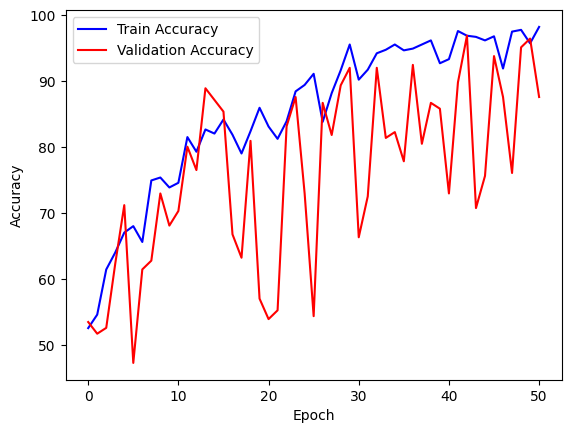

# Epoch: 52 / 150
Train Loss: 5.8153, Train Accuracy: 97.34%
Validation Loss: 2.0514, Validation Accuracy: 96.02%
# Epoch: 53 / 150
Train Loss: 4.1865, Train Accuracy: 98.40%
Validation Loss: 4.3882, Validation Accuracy: 90.27%
# Epoch: 54 / 150
Train Loss: 5.1968, Train Accuracy: 98.31%
Validation Loss: 14.1214, Validation Accuracy: 66.37%
# Epoch: 55 / 150
Train Loss: 5.7087, Train Accuracy: 97.52%
Validation Loss: 7.2589, Validation Accuracy: 80.97%
# Epoch: 56 / 150
Train Loss: 7.5191, Train Accuracy: 96.45%
Validation Loss: 10.1469, Validation Accuracy: 72.57%
# Epoch: 57 / 150
Train Loss: 6.9047, Train Accuracy: 96.81%
Validation Loss: 7.9366, Validation Accuracy: 83.63%
# Epoch: 58 / 150
Train Loss: 5.5418, Train Accuracy: 97.78%
Validation Loss: 2.5383, Validation Accuracy: 94.69%
# Epoch: 59 / 150
Train Loss: 5.4740, Train Accuracy: 97.43%
Validation Loss: 7.2823, Validation Accuracy: 78.76%
# Epoch: 60 / 150
Train Loss: 6.9720, Train Accuracy: 96.81%
Validation Loss: 2.6349, 

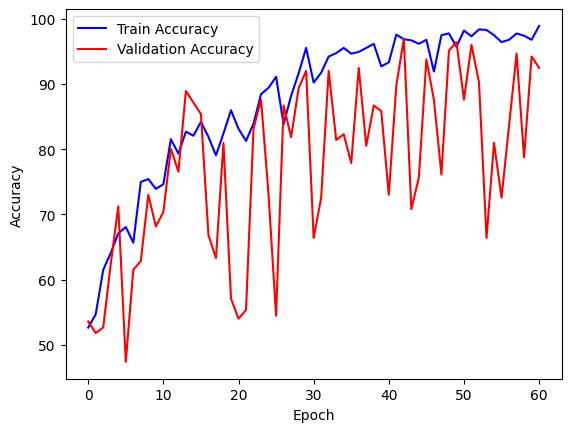

# Epoch: 62 / 150
Train Loss: 6.7736, Train Accuracy: 96.54%
Validation Loss: 1.2032, Validation Accuracy: 99.12%
# Epoch: 63 / 150
Train Loss: 4.0738, Train Accuracy: 98.58%
Validation Loss: 4.3408, Validation Accuracy: 88.94%
# Epoch: 64 / 150
Train Loss: 4.6920, Train Accuracy: 97.69%
Validation Loss: 3.9296, Validation Accuracy: 92.04%
# Epoch: 65 / 150
Train Loss: 4.2655, Train Accuracy: 98.05%
Validation Loss: 7.2209, Validation Accuracy: 82.30%
# Epoch: 66 / 150
Train Loss: 2.5698, Train Accuracy: 99.29%
Validation Loss: 2.3537, Validation Accuracy: 94.69%
# Epoch: 67 / 150
Train Loss: 3.2426, Train Accuracy: 98.67%
Validation Loss: 6.2004, Validation Accuracy: 86.28%
# Epoch: 68 / 150
Train Loss: 2.9389, Train Accuracy: 98.58%
Validation Loss: 2.4954, Validation Accuracy: 96.90%
# Epoch: 69 / 150
Train Loss: 2.5161, Train Accuracy: 98.94%
Validation Loss: 5.0675, Validation Accuracy: 89.38%
# Epoch: 70 / 150
Train Loss: 2.3152, Train Accuracy: 99.38%
Validation Loss: 2.6666, Va

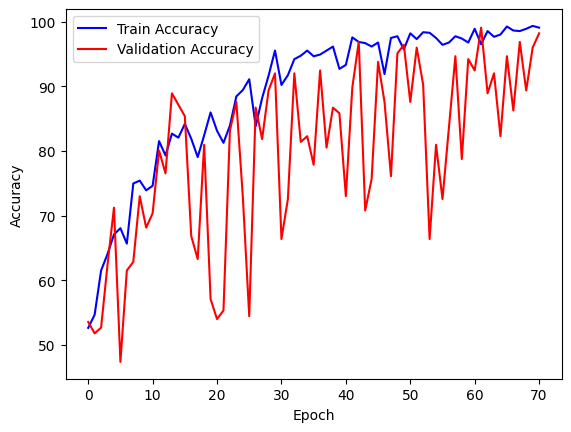

# Epoch: 72 / 150
Train Loss: 2.8652, Train Accuracy: 99.11%
Validation Loss: 6.1580, Validation Accuracy: 85.40%
# Epoch: 73 / 150
Train Loss: 3.8102, Train Accuracy: 98.40%
Validation Loss: 3.4109, Validation Accuracy: 92.92%
# Epoch: 74 / 150
Train Loss: 3.0731, Train Accuracy: 99.02%
Validation Loss: 1.3071, Validation Accuracy: 96.02%
# Epoch: 75 / 150
Train Loss: 4.4639, Train Accuracy: 98.23%
Validation Loss: 2.9432, Validation Accuracy: 94.69%
# Epoch: 76 / 150
Train Loss: 4.1072, Train Accuracy: 98.31%
Validation Loss: 1.1834, Validation Accuracy: 98.23%
# Epoch: 77 / 150
Train Loss: 2.3006, Train Accuracy: 99.29%
Validation Loss: 2.8434, Validation Accuracy: 95.13%
# Epoch: 78 / 150
Train Loss: 1.6846, Train Accuracy: 99.73%
Validation Loss: 3.6762, Validation Accuracy: 91.15%
# Epoch: 79 / 150
Train Loss: 2.9274, Train Accuracy: 98.94%
Validation Loss: 3.9453, Validation Accuracy: 92.92%
# Epoch: 80 / 150
Train Loss: 2.0733, Train Accuracy: 99.20%
Validation Loss: 3.2171, Va

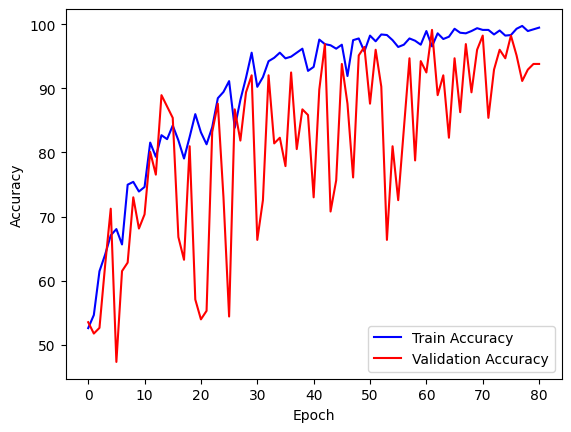

# Epoch: 82 / 150
Train Loss: 2.0107, Train Accuracy: 99.38%
Validation Loss: 1.2326, Validation Accuracy: 96.90%
# Epoch: 83 / 150
Train Loss: 2.4397, Train Accuracy: 99.20%
Validation Loss: 2.3940, Validation Accuracy: 94.69%
# Epoch: 84 / 150
Train Loss: 2.3959, Train Accuracy: 99.29%
Validation Loss: 3.2511, Validation Accuracy: 92.92%
# Epoch: 85 / 150
Train Loss: 2.0051, Train Accuracy: 99.38%
Validation Loss: 9.5699, Validation Accuracy: 83.19%
# Epoch: 86 / 150
Train Loss: 2.6277, Train Accuracy: 98.76%
Validation Loss: 0.7671, Validation Accuracy: 98.67%
# Epoch: 87 / 150
Train Loss: 2.9504, Train Accuracy: 99.20%
Validation Loss: 1.9606, Validation Accuracy: 95.13%
# Epoch: 88 / 150
Train Loss: 2.4597, Train Accuracy: 99.11%
Validation Loss: 2.3133, Validation Accuracy: 95.58%
# Epoch: 89 / 150
Train Loss: 1.9259, Train Accuracy: 99.47%
Validation Loss: 1.2231, Validation Accuracy: 98.23%
# Epoch: 90 / 150
Train Loss: 2.1466, Train Accuracy: 99.38%
Validation Loss: 6.3599, Va

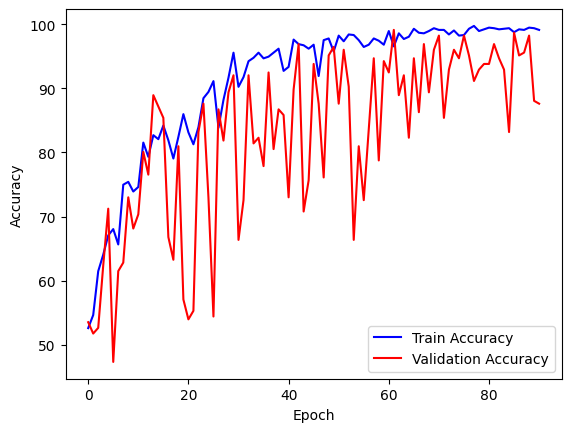

# Epoch: 92 / 150
Train Loss: 2.4590, Train Accuracy: 99.20%
Validation Loss: 4.0303, Validation Accuracy: 92.04%
# Epoch: 93 / 150
Train Loss: 2.2962, Train Accuracy: 99.38%
Validation Loss: 4.7600, Validation Accuracy: 92.48%
# Epoch: 94 / 150
Train Loss: 2.8430, Train Accuracy: 99.02%
Validation Loss: 4.3765, Validation Accuracy: 91.15%
# Epoch: 95 / 150
Train Loss: 2.3756, Train Accuracy: 98.67%
Validation Loss: 2.9391, Validation Accuracy: 92.48%
# Epoch: 96 / 150
Train Loss: 3.6476, Train Accuracy: 98.40%
Validation Loss: 1.2069, Validation Accuracy: 98.23%
# Epoch: 97 / 150
Train Loss: 2.5814, Train Accuracy: 98.58%
Validation Loss: 8.0436, Validation Accuracy: 79.65%
# Epoch: 98 / 150
Train Loss: 3.8326, Train Accuracy: 98.40%
Validation Loss: 3.9288, Validation Accuracy: 92.48%
# Epoch: 99 / 150
Train Loss: 1.8959, Train Accuracy: 99.38%
Validation Loss: 3.6749, Validation Accuracy: 93.36%
# Epoch: 100 / 150
Train Loss: 2.7764, Train Accuracy: 98.85%
Validation Loss: 2.8202, V

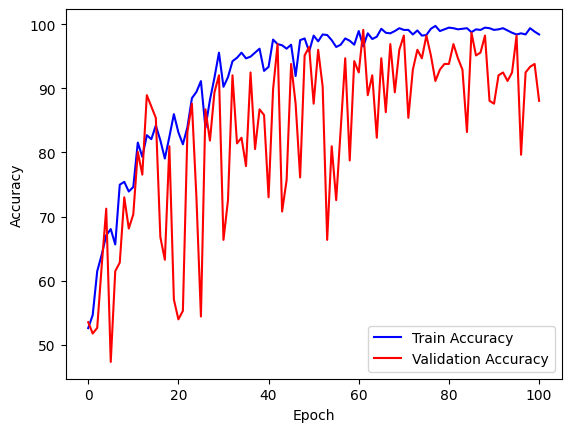

# Epoch: 102 / 150
Train Loss: 2.0933, Train Accuracy: 99.47%
Validation Loss: 4.6434, Validation Accuracy: 89.38%
# Epoch: 103 / 150
Train Loss: 2.1297, Train Accuracy: 99.38%
Validation Loss: 6.1727, Validation Accuracy: 87.17%
# Epoch: 104 / 150
Train Loss: 1.1654, Train Accuracy: 99.65%
Validation Loss: 2.9793, Validation Accuracy: 92.48%
# Epoch: 105 / 150
Train Loss: 2.3248, Train Accuracy: 99.11%
Validation Loss: 2.9012, Validation Accuracy: 94.25%
# Epoch: 106 / 150
Train Loss: 3.4526, Train Accuracy: 98.14%
Validation Loss: 1.5465, Validation Accuracy: 96.90%
# Epoch: 107 / 150
Train Loss: 1.5164, Train Accuracy: 99.47%
Validation Loss: 2.7280, Validation Accuracy: 91.59%
# Epoch: 108 / 150
Train Loss: 1.4161, Train Accuracy: 99.65%
Validation Loss: 2.3656, Validation Accuracy: 93.81%
# Epoch: 109 / 150
Train Loss: 1.4286, Train Accuracy: 99.65%
Validation Loss: 3.7135, Validation Accuracy: 91.15%
# Epoch: 110 / 150
Train Loss: 0.8780, Train Accuracy: 99.82%
Validation Loss: 1

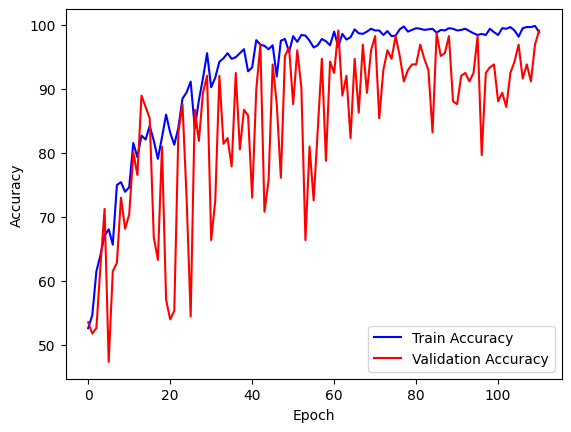

# Epoch: 112 / 150
Train Loss: 2.5008, Train Accuracy: 98.76%
Validation Loss: 1.1857, Validation Accuracy: 98.67%
# Epoch: 113 / 150
Train Loss: 0.9694, Train Accuracy: 99.73%
Validation Loss: 1.4945, Validation Accuracy: 97.35%
# Epoch: 114 / 150
Train Loss: 1.0486, Train Accuracy: 99.65%
Validation Loss: 1.4747, Validation Accuracy: 98.23%
# Epoch: 115 / 150
Train Loss: 2.9860, Train Accuracy: 98.67%
Validation Loss: 2.3791, Validation Accuracy: 94.69%
# Epoch: 116 / 150
Train Loss: 2.4676, Train Accuracy: 98.67%
Validation Loss: 2.3508, Validation Accuracy: 93.36%
# Epoch: 117 / 150
Train Loss: 1.2063, Train Accuracy: 99.73%
Validation Loss: 3.6616, Validation Accuracy: 93.36%
# Epoch: 118 / 150
Train Loss: 1.3666, Train Accuracy: 99.65%
Validation Loss: 5.5568, Validation Accuracy: 89.38%
# Epoch: 119 / 150
Train Loss: 1.1174, Train Accuracy: 99.56%
Validation Loss: 1.9325, Validation Accuracy: 95.58%
# Epoch: 120 / 150
Train Loss: 1.0935, Train Accuracy: 99.82%
Validation Loss: 1

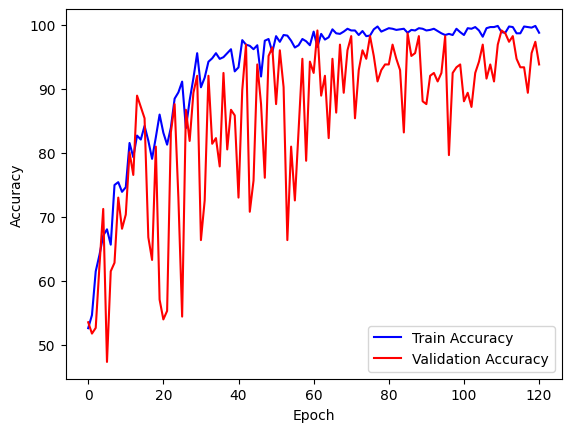

# Epoch: 122 / 150
Train Loss: 1.8228, Train Accuracy: 99.11%
Validation Loss: 0.5849, Validation Accuracy: 99.56%
# Epoch: 123 / 150
Train Loss: 0.9205, Train Accuracy: 99.91%
Validation Loss: 0.4160, Validation Accuracy: 99.12%
# Epoch: 124 / 150
Train Loss: 1.7213, Train Accuracy: 99.65%
Validation Loss: 1.1514, Validation Accuracy: 98.67%
# Epoch: 125 / 150
Train Loss: 3.4040, Train Accuracy: 98.58%
Validation Loss: 1.7271, Validation Accuracy: 96.02%
# Epoch: 126 / 150
Train Loss: 0.9070, Train Accuracy: 99.82%
Validation Loss: 2.5159, Validation Accuracy: 95.13%
# Epoch: 127 / 150
Train Loss: 2.6974, Train Accuracy: 98.49%
Validation Loss: 3.3769, Validation Accuracy: 90.27%
# Epoch: 128 / 150
Train Loss: 1.6906, Train Accuracy: 99.73%
Validation Loss: 1.8073, Validation Accuracy: 96.02%
# Epoch: 129 / 150
Train Loss: 1.3773, Train Accuracy: 99.47%
Validation Loss: 1.8266, Validation Accuracy: 95.13%
# Epoch: 130 / 150
Train Loss: 1.7368, Train Accuracy: 99.56%
Validation Loss: 1

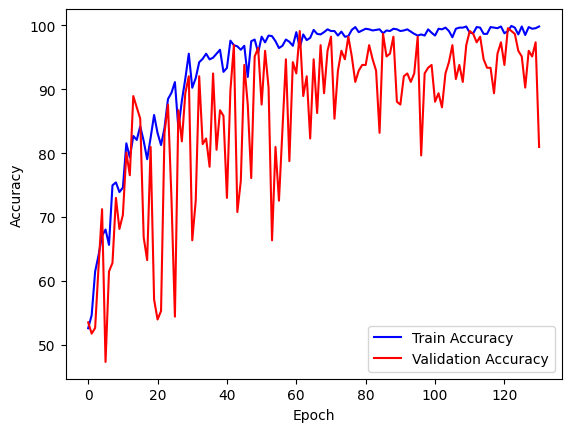

# Epoch: 132 / 150
Train Loss: 1.5009, Train Accuracy: 99.20%
Validation Loss: 1.9231, Validation Accuracy: 96.90%
# Epoch: 133 / 150
Train Loss: 2.1934, Train Accuracy: 99.02%
Validation Loss: 3.2631, Validation Accuracy: 92.04%
# Epoch: 134 / 150
Train Loss: 1.9206, Train Accuracy: 99.20%
Validation Loss: 5.5231, Validation Accuracy: 87.61%
# Epoch: 135 / 150
Train Loss: 3.2088, Train Accuracy: 98.31%
Validation Loss: 3.0920, Validation Accuracy: 96.02%
# Epoch: 136 / 150
Train Loss: 0.5816, Train Accuracy: 100.00%
Validation Loss: 2.2506, Validation Accuracy: 96.02%
# Epoch: 137 / 150
Train Loss: 0.9944, Train Accuracy: 99.65%
Validation Loss: 1.1707, Validation Accuracy: 97.79%
# Epoch: 138 / 150
Train Loss: 0.8099, Train Accuracy: 99.91%
Validation Loss: 1.6187, Validation Accuracy: 95.58%
# Epoch: 139 / 150
Train Loss: 0.8764, Train Accuracy: 99.65%
Validation Loss: 2.7409, Validation Accuracy: 93.36%
# Epoch: 140 / 150
Train Loss: 1.3334, Train Accuracy: 99.73%
Validation Loss: 

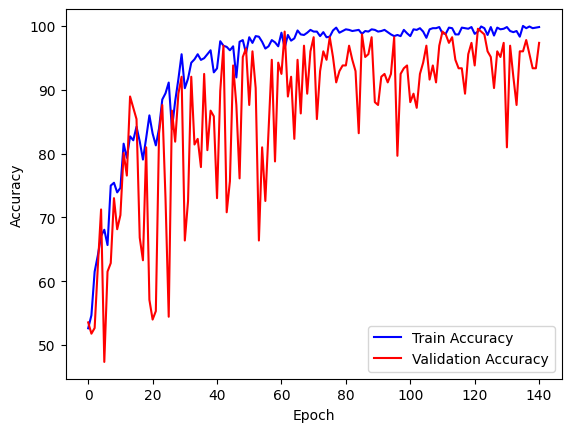

# Epoch: 142 / 150
Train Loss: 1.2226, Train Accuracy: 99.56%
Validation Loss: 2.4232, Validation Accuracy: 93.81%
# Epoch: 143 / 150
Train Loss: 1.1911, Train Accuracy: 99.65%
Validation Loss: 0.6732, Validation Accuracy: 99.56%
# Epoch: 144 / 150
Train Loss: 1.8305, Train Accuracy: 99.20%
Validation Loss: 9.1902, Validation Accuracy: 76.55%
# Epoch: 145 / 150
Train Loss: 1.9851, Train Accuracy: 99.38%
Validation Loss: 1.4228, Validation Accuracy: 96.46%
# Epoch: 146 / 150
Train Loss: 5.1803, Train Accuracy: 97.52%
Validation Loss: 0.9306, Validation Accuracy: 99.56%
# Epoch: 147 / 150
Train Loss: 0.8555, Train Accuracy: 100.00%
Validation Loss: 0.7452, Validation Accuracy: 99.12%
# Epoch: 148 / 150
Train Loss: 0.8008, Train Accuracy: 99.73%
Validation Loss: 3.7057, Validation Accuracy: 92.04%
# Epoch: 149 / 150
Train Loss: 1.1293, Train Accuracy: 99.56%
Validation Loss: 5.7381, Validation Accuracy: 84.07%
# Epoch: 150 / 150
Train Loss: 0.7199, Train Accuracy: 99.91%
Validation Loss: 

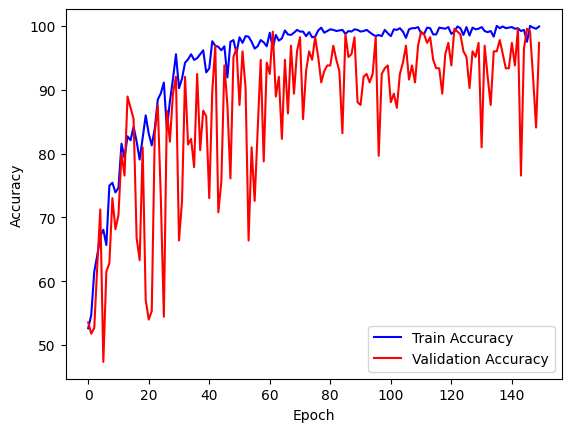

In [ ]:
# 학습과 평가를 위한 에폭 수와 조기 종료를 위한 변수 정의
epoch = 150
patience = 10  # Number of epochs to wait for improvement
best_accuracy = 0
best_epoch = 0
counter = 0  # Counter for early stopping

# Learning
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

print('***START EPOCH***')

for E in range(epoch):
    print('# Epoch: {} / 150'.format(E+1))

    # Train
    train_loss, train_accuracy = run_train(model, criterion, optimizer, train_loader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validate
    valid_loss, valid_accuracy = run_valid(model, criterion, valid_loader)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_accuracy)

    print('Train Loss: {:.4f}, Train Accuracy: {:.2f}%'.format(train_loss, train_accuracy))
    print('Validation Loss: {:.4f}, Validation Accuracy: {:.2f}%'.format(valid_loss, valid_accuracy))

    # Early stopping check
    if valid_accuracy > best_accuracy:
        best_accuracy = valid_accuracy
        best_epoch = E
        # Save the weight matrices and bias vectors that will be loaded for testing later
        torch.save(model.state_dict(),'/content/drive/MyDrive/brainAI/제출파일/Aneurysm_regression.pth')
        counter = 0
    else:
        counter += 1

    # if counter >= patience:
    #     print('Early stopping. No improvement in validation accuracy for {} epochs.'.format(patience))
    #     break

    if E % 10 == 0:
        plt.plot(range(len(train_accuracies)), train_accuracies, 'b', label='Train Accuracy')
        plt.plot(range(len(valid_accuracies)), valid_accuracies, 'r', label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

print('Best Validation Accuracy: {} achieved at epoch {}'.format(best_accuracy, best_epoch))
plt.plot(range(len(train_accuracies)), train_accuracies, 'b', label='Train Accuracy')
plt.plot(range(len(valid_accuracies)), valid_accuracies, 'r', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
torch.save(model.state_dict(),'/content/drive/MyDrive/brainAI/제출파일/Aneurysm_regression.pth')